In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


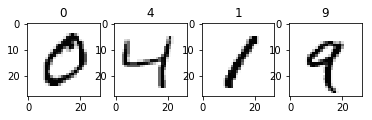

In [4]:
for i in xrange(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(X_train[i].reshape(28, 28), cmap='Greys')
    plt.title(np.argmax(y_train[i]))

In [5]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.5),
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128,
          nb_epoch=10, verbose=1,
          validation_split=0.1)

# Final test evaluation
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s - loss: 0.2865 - acc: 0.9145 - val_loss: 0.1186 - val_acc: 0.9710

## Exercise 1: Keras functional API

We'e built a model using the `Sequential API` from Keras. Keras also offers a [functional API](https://keras.io/getting-started/functional-api-guide/). This API is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.

Can you rewrite the model above using the functional API?

In [ ]:
# rewrite here the same model using the functional API
from keras.layers import Input, Dense
from keras.models import Model

# this returns a tensor
inputs = Input(shape=(784,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(512, activation='relu')(inputs)
predictions = Dense(10, activation='softmax')(x)

# this creates a model that includes
# the Input layer and three Dense layers
model = Model(input=inputs, output=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          nb_epoch=50, batch_size=32)

#model.fit(data, labels,nb_epoch=10, batch_size=128, verbose=1,
          #validation_split=0.1)  # starts training

# Final test evaluation
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


Epoch 1/50
52128/60000 [=========================>....] - ETA: 2s - loss: 0.2145 - acc: 0.9363  

## Exercise 2: Convolutional Recap

The above model is a very simple fully connected deep neural network. As we have seen, Convolutional Neural Networks are much more powerful when dealing with images. Below we've written a simple CNN model. In order to pass the data to this model the data needs to be reshaped as a 4D tensor.

As we will soon see, Tensorflow requires 4D tensors with this shape:

    N_images x Height x Width x Channels
    
1. Can you reshape X_train and X_test so that they have the correct shape?
2. Can you write a convolutional model using the sequential API?
3. Can you rewrite it using the functional API?

In [7]:
# put your reshape code here

X_train.reshape(X_train, [ 6000, 28, 28])

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
# it should be (60000, 28, 28, 1)
X_train.shape

In [ ]:
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D, Flatten


# Design a CNN using the sequential API



# Fit your model


In [ ]:
# rewrite the above model using the functional API

## Exrcise 3: Discuss with the person next to you 

1. What are the pros/cons of the sequential API?
- What are the pros/cons of the functional API?
- What are the key differences between a Fully connected and a Convolutional neural network?
- What is a dropout layer? How does it work? Why does it help?


In [ ]:
#functional api can be parallel